In [7]:
### 导入用电数据
import pandas as pd
import numpy as np
userinfo = pd.read_excel("1.陆圩村用户信息表.xlsx")
data = pd.read_excel("2.陆圩村用户日电量表.xlsx")

In [10]:
user1 = userinfo[(userinfo['行业类型'] == "乡村居民") & (userinfo['用电户状态'] == "正常")]
len(user1)

324

In [11]:
user2 = userinfo[(userinfo['行业类型'] != "乡村居民") & (userinfo['用电户状态'] == "正常")]
len(user2)

42

In [25]:
# 筛选出 2021年的数据
import datetime
data["日期"] = pd.to_datetime(data["日期"])
ST = data["日期"].apply(lambda x : True if x.year==2021 else False)
data_st = data[ST]

In [36]:
# 筛选出居民数据
data_st_user1 = data_st[data_st["客户编号"].apply(lambda x : True if x in list(user1["客户编号"]) else False)]
st_user1 = set(data_st_user1["客户编号"])
print(len(st_user1))
# 筛选出非居民数据
data_st_user2 = data_st[data_st["客户编号"].apply(lambda x : True if x in list(user2["客户编号"]) else False)]
st_user2 = set(data_st_user2["客户编号"])
print(len(st_user2))

226
21


In [123]:
print(sum(data_st_user1["电量"]))
print(sum(data_st_user2["电量"]))
print(sum(data_st_user1["电量"])/len(data_st_user1["电量"]))
print(sum(data_st_user2["电量"])/len(data_st_user2["电量"]))

280753.17819999845
210626.49899999815
3.4067026428189884
27.496931984333962


### 1. 简单统计并画图，以年为尺度

In [124]:
# 居民用户数量
user1_num = []
user2_num = []
user1_sumpower = []
user2_sumpower = []
user1_avgpower = []
user2_avgpower = []
for year in [2019,2020,2021]:
    ST = data["日期"].apply(lambda x : True if x.year==year else False)
    data_st = data[ST]

    # 筛选出居民数据
    data_st_user1 = data_st[data_st["客户编号"].apply(lambda x : True if x in list(user1["客户编号"]) else False)]
    st_user1 = set(data_st_user1["客户编号"])
    user1_num.append(len(st_user1))
    user1_sumpower.append(sum(data_st_user1["电量"]))
    user1_avgpower.append(sum(data_st_user1["电量"])/len(data_st_user1["电量"]))
    
    # 筛选出非居民数据
    data_st_user2 = data_st[data_st["客户编号"].apply(lambda x : True if x in list(user2["客户编号"]) else False)]
    st_user2 = set(data_st_user2["客户编号"])
    user2_num.append(len(st_user2))
    user2_sumpower.append(sum(data_st_user2["电量"]))
    user2_avgpower.append(sum(data_st_user2["电量"])/len(data_st_user2["电量"]))

#### 1.1 画图

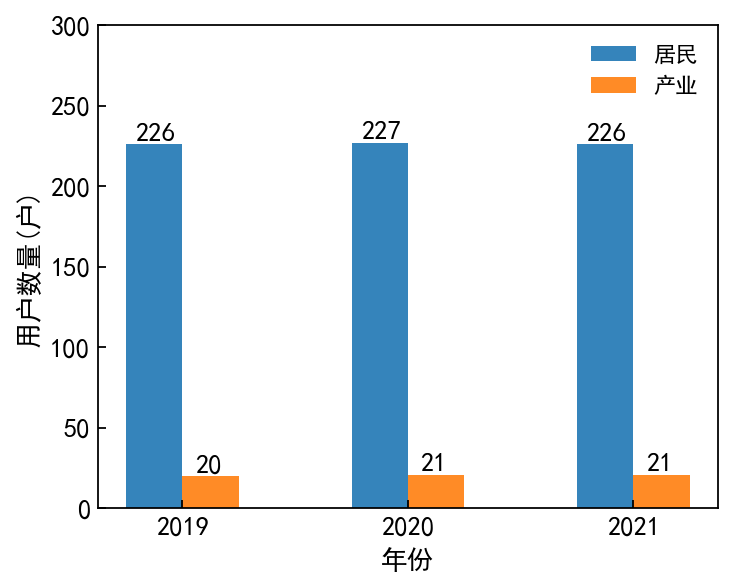

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
"font.family":"serif",    
"font.size": 12,
"mathtext.fontset":'stix',
"font.serif": 'SimHei',
"xtick.direction":"in",
"ytick.direction":"in",
}
rcParams.update(config)
plt.figure(figsize=(5,4), dpi=160)

bar_width = 0.25
tick_label = ['2019','2020','2021']
Y = user1_num
Y1 = user2_num
X = np.arange(len(Y))
# 显示每个柱的具体高度
for x,y in zip(X,Y):
    plt.text(x+0.005,y+0.005,'%d' %y, ha='center',va='bottom')

for x,y1 in zip(X,Y1):
    plt.text(x+0.24,y1+0.005,'%d' %y1, ha='center',va='bottom')
 
#绘制柱状图    
plt.bar(X, Y, bar_width, align="center",alpha=0.9)
plt.bar(X+bar_width, Y1, bar_width, align="center",alpha=0.9)
plt.ylim([0,300])
plt.xlabel("年份")
plt.ylabel("用户数量(户)")

plt.xticks(X+bar_width/2, tick_label)
plt.legend(['居民','产业'],frameon=False, fontsize = 'small',loc="best")


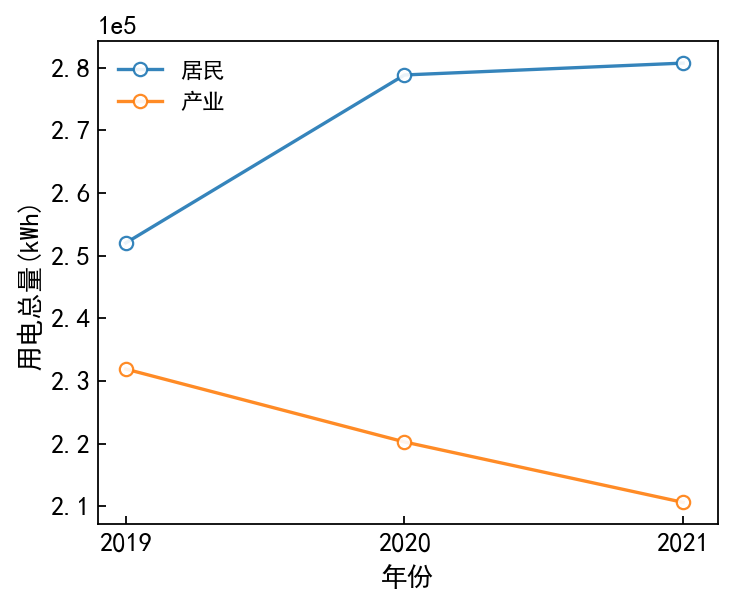

In [113]:
plt.figure(figsize=(5,4), dpi=160)

bar_width = 0.25
tick_label = ['2019','2020','2021']
Y = user1_sumpower
Y1 = user2_sumpower
X = np.arange(len(Y))
# 显示每个柱的具体高度

plt.plot(X, Y, marker= "o",mfc='w',alpha=0.9)
plt.plot(X, Y1, marker= "o",mfc='w', alpha=0.9)

 
plt.xticks(X+bar_width/2, tick_label)
plt.legend(['居民','产业'],frameon=False, fontsize = 'small',loc="best")

ax = plt.gca()  # 获取当前图像的坐标轴信息
ax.yaxis.get_major_formatter().set_powerlimits((0,1)) # 将坐标轴的base number设置为一位。
plt.xlabel("年份")
plt.ylabel("用电总量(kWh)")
plt.xticks(X, tick_label)
plt.legend(['居民','产业'],frameon=False, fontsize = 'small',loc="best")


([<matplotlib.axis.XTick at 0x1607b42f850>,
 [Text(0, 0, '2019'), Text(1, 0, '2020'), Text(2, 0, '2021')])

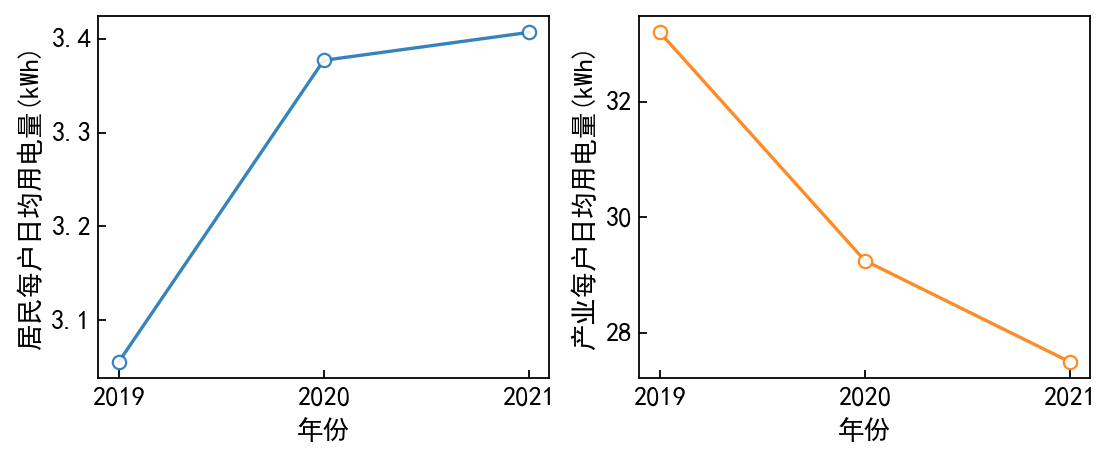

In [141]:
plt.figure(figsize=(8,3), dpi=160)
plt.subplot(1,2,1)
bar_width = 0.25
tick_label = ['2019','2020','2021']
Y = user1_avgpower
Y1 = user2_avgpower
X = np.arange(len(Y))
# 显示每个柱的具体高度
plt.plot(X, Y, marker= "o",mfc='w',alpha=0.9)
#plt.plot(X, Y1, marker= "o",mfc='w', alpha=0.9)

plt.xticks(X, tick_label)
#plt.legend(['居民','产业'],frameon=False, fontsize = 'small',loc="best")

plt.xlabel("年份")
plt.ylabel("居民每户日均用电量(kWh)")

plt.xticks(X, tick_label)

plt.subplot(1,2,2)

plt.plot(X, Y1, c='#ff7f0e', marker= "o",mfc='w',alpha=0.9)
plt.xticks(X, tick_label)
plt.xlabel("年份")
plt.ylabel("产业每户日均用电量(kWh)")

plt.xticks(X, tick_label)

In [153]:
print(user2_num)
print(user2_sumpower)
print(user2_avgpower)


[20, 21, 21]
[231908.5868000009, 220274.3703000003, 210626.49899999815]
[33.1961904952764, 29.249020090293495, 27.496931984333962]


#### 计算F1 F2 和 I

In [150]:
user1_num_norm = np.array(user1_num)/226
user1_sumpower_norm = np.array(user1_sumpower)/280753.18
user1_avgpower_norm = np.array(user1_avgpower)/3.41
    
user2_num_norm = np.array(user2_num)/21
user2_sumpower_norm = np.array(user2_sumpower)/210626.50
user2_avgpower_norm = np.array(user2_avgpower)/27.50

F1 = 0.41*user1_num_norm + 0.26*user1_sumpower_norm + 0.33*user1_avgpower_norm

F2 = 0.45*user2_num_norm + 0.23*user2_sumpower_norm + 0.32*user2_avgpower_norm

I = 0.53*F1 + 0.47*F2
print(F1)
print(F2)
print(I)

[0.9391068  0.99685989 0.9996809 ]
[1.06809399 1.03088752 0.9999643 ]
[0.99973078 1.01285288 0.9998141 ]


#### 画图

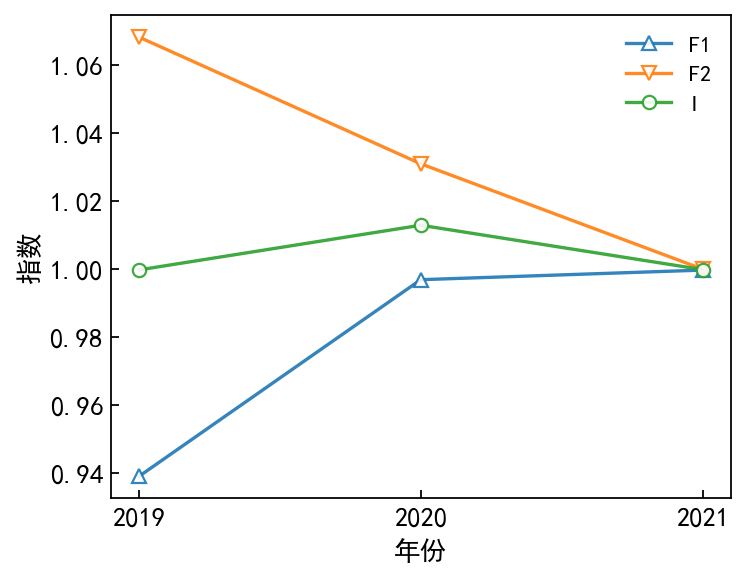

In [147]:
plt.figure(figsize=(5,4), dpi=160)
tick_label = ['2019','2020','2021']

X = np.arange(len(F1))
# 显示每个柱的具体高度

plt.plot(X, F1,color = '#1f77b4', marker= "^",mfc='w',alpha=0.9)
plt.plot(X, F2 ,color = '#ff7f0e', marker= "v",mfc='w',alpha=0.9)
plt.plot(X, I,color = '#2ca02c', marker= "o",mfc='w',alpha=0.9)

plt.xlabel("年份")
plt.ylabel("指数")
plt.xticks(X, tick_label)
plt.legend(['F1','F2',"I"],frameon=False, fontsize = 'small',loc="best")